# Plant Disease Detection
- In this i can make a plant disease detection project.

## Kaggle API

In [4]:
!pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 41.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    F

In [5]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


# Download Dataset

In [6]:
!kaggle datasets download -d arjuntejaswi/plant-village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
100% 328M/329M [00:03<00:00, 81.7MB/s]
100% 329M/329M [00:03<00:00, 90.3MB/s]


# Unzip the file

In [7]:
!unzip /content/plant-village.zip

Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

# Split the data into train and test set

In [8]:
import os
import shutil

In [9]:
# Original dir
original_dir='/content/PlantVillage'

# Define the base dir and inside the base dir make atrain and test dir
base_dir='plant_disease'
print(f"Making Dir {base_dir}")
os.makedirs(base_dir, exist_ok=True)

# now make a train and test dir inside the base dir
train_dir=os.path.join(base_dir,"train")
test_dir=os.path.join(base_dir,"test")

print(f"Making Dir {train_dir}")
os.makedirs(train_dir,exist_ok=True)

print(f"Making Dir {test_dir}")
os.makedirs(test_dir,exist_ok=True)

Making Dir plant_disease
Making Dir plant_disease/train
Making Dir plant_disease/test


# Conclussion
- we can make a train and test dir
- now we can move the images in both train and test dir

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
classes=[cls for cls in os.listdir(original_dir) if os.path.isdir(os.path.join(original_dir,cls))]

for cls in classes:
  each_class_dir=os.path.join(original_dir,cls)
  # print(each_class_dir)

  images=os.listdir(each_class_dir)
  # print(images)

  # Train test split
  train_img,test_img=train_test_split(images,test_size=0.2,random_state=43)
  # print(len(images))
  # print(len(train_img),len(test_img))

  # Now make a dir for each class
  train_cls_dir=os.path.join(train_dir,cls)
  test_cls_dir=os.path.join(test_dir,cls)

  print(f'making train dir for each class {train_cls_dir}')
  os.makedirs(train_cls_dir,exist_ok=True)

  print(f'making test dir for each class {test_cls_dir}')
  os.makedirs(test_cls_dir,exist_ok=True)

  # place the images in each dir
  for img in train_img:
    # shutil.copy(sourse_path  ,  dis_path)

     # src path
    src_path=os.path.join(each_class_dir,img)

    # dis_path
    dis_path=os.path.join(train_cls_dir,img)

    print(f"copy image {img} form {src_path} to {dis_path}")
    shutil.copy(src_path ,dis_path )

  for img in test_img:
    # src path
    src_path=os.path.join(each_class_dir,img)

    # dis_path
    dis_path=os.path.join(test_cls_dir,img)

    print(f"copy image {img} form {src_path} to {dis_path}")
    shutil.copy(src_path , dis_path)

Streaming output truncated to the last 5000 lines.
copy image 0691ea32-a88a-4487-a92c-1159140ff880___JR_HL 7694.JPG form /content/PlantVillage/Pepper__bell___healthy/0691ea32-a88a-4487-a92c-1159140ff880___JR_HL 7694.JPG to plant_disease/train/Pepper__bell___healthy/0691ea32-a88a-4487-a92c-1159140ff880___JR_HL 7694.JPG
copy image 447aa7fa-b251-4687-a25d-bf314eaf3f7e___JR_HL 8063.JPG form /content/PlantVillage/Pepper__bell___healthy/447aa7fa-b251-4687-a25d-bf314eaf3f7e___JR_HL 8063.JPG to plant_disease/train/Pepper__bell___healthy/447aa7fa-b251-4687-a25d-bf314eaf3f7e___JR_HL 8063.JPG
copy image 77d77a2e-d24f-42d4-8d37-f36e6571b4f3___JR_HL 8632.JPG form /content/PlantVillage/Pepper__bell___healthy/77d77a2e-d24f-42d4-8d37-f36e6571b4f3___JR_HL 8632.JPG to plant_disease/train/Pepper__bell___healthy/77d77a2e-d24f-42d4-8d37-f36e6571b4f3___JR_HL 8632.JPG
copy image 4b7612c8-8f1c-4cdf-a4bb-2a9d266daa91___JR_HL 8852.JPG form /content/PlantVillage/Pepper__bell___healthy/4b7612c8-8f1c-4cdf-a4bb-2a9

# Data Generator
- Dataset is  to long we can use Image Data Generator for loading the data efficently.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train Generator

In [13]:
train_datagen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

# Test Generator

In [14]:
test_datagen=ImageDataGenerator(
        rescale=1./255
)

# Apply Train Generator on `Train Data Dir`

# Batch size small
- live lost plot

In [15]:
train_data_generator=train_datagen.flow_from_directory(
    directory='/content/plant_disease/train',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 16504 images belonging to 15 classes.


# Apply Test Generator on `Test Data Dir`

In [16]:
test_data_generator=test_datagen.flow_from_directory(
    directory='/content/plant_disease/test',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 4134 images belonging to 15 classes.


# Conclussion
- We can build a image data generator.
- Now we can use `pre-train model` i-e `VGG16` for train  the model.
- We can add our last layer and remove the last layer of `VGG16`.

In [17]:
from tensorflow.keras.applications import VGG16

In [18]:
base_model=VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [19]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Freeze the layer
- We can freeze the layers so that weights can't be change

In [20]:
for layers in base_model.layers:
  layers.trainable=False

In [21]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Add our last layer

In [22]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [23]:
model=Sequential()

# add a base model
model.add(base_model)

model.add(layers.BatchNormalization())
# add a Flatten layer
model.add(layers.Flatten())

# add a dense layer
model.add(layers.Dense(units=100,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=15,activation='softmax'))

# Compile the model

In [24]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [25]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

# Add Early Stoping  to avoid overfitting

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [27]:
!pip install livelossplot

In [28]:
from livelossplot import PlotLossesKerasTF
plot_losses = PlotLossesKerasTF()

In [29]:
history=model.fit(train_data_generator,
                  epochs=19,
                  validation_data=(test_data_generator),
                  batch_size=32,
                  initial_epoch=18,
                  callbacks=[early_stopping]
                  )

Epoch 19/19


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


516/516 ━━━━━━━━━━━━━━━━━━━━ 120s 204ms/step - accuracy: 0.4244 - loss: 1.8445 - val_accuracy: 0.7177 - val_loss: 0.8258
Restoring model weights from the end of the best epoch: 19.


# Model Performance

In [30]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

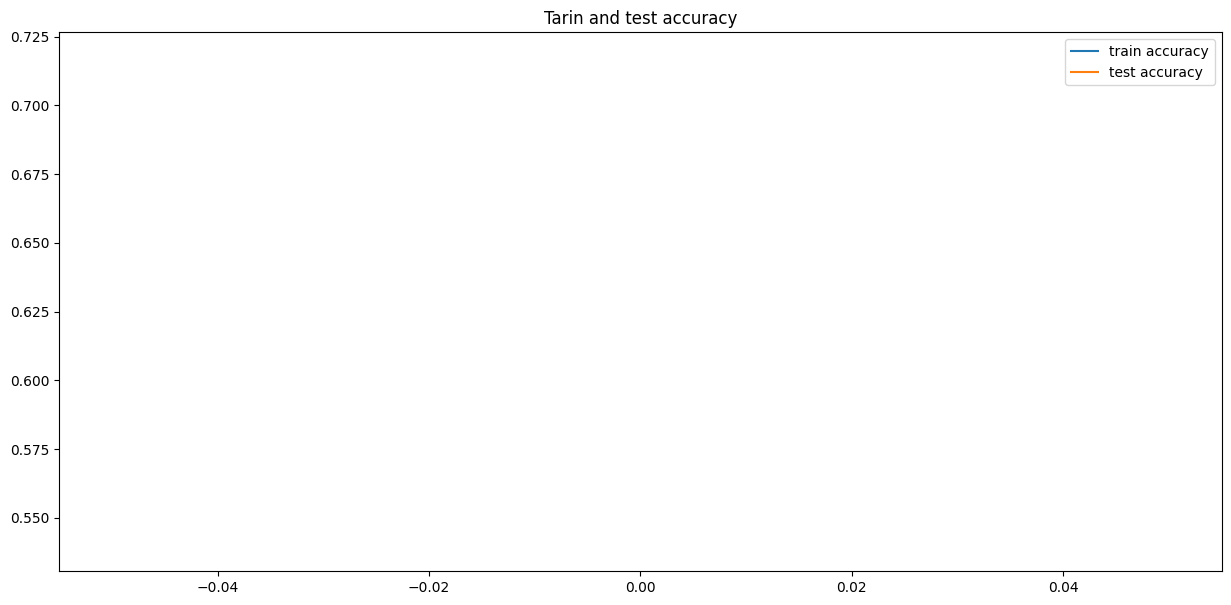

In [31]:
plt.figure(figsize=(15,7))
plt.title("Tarin and test accuracy")
plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label="test accuracy")
plt.legend()
plt.show()

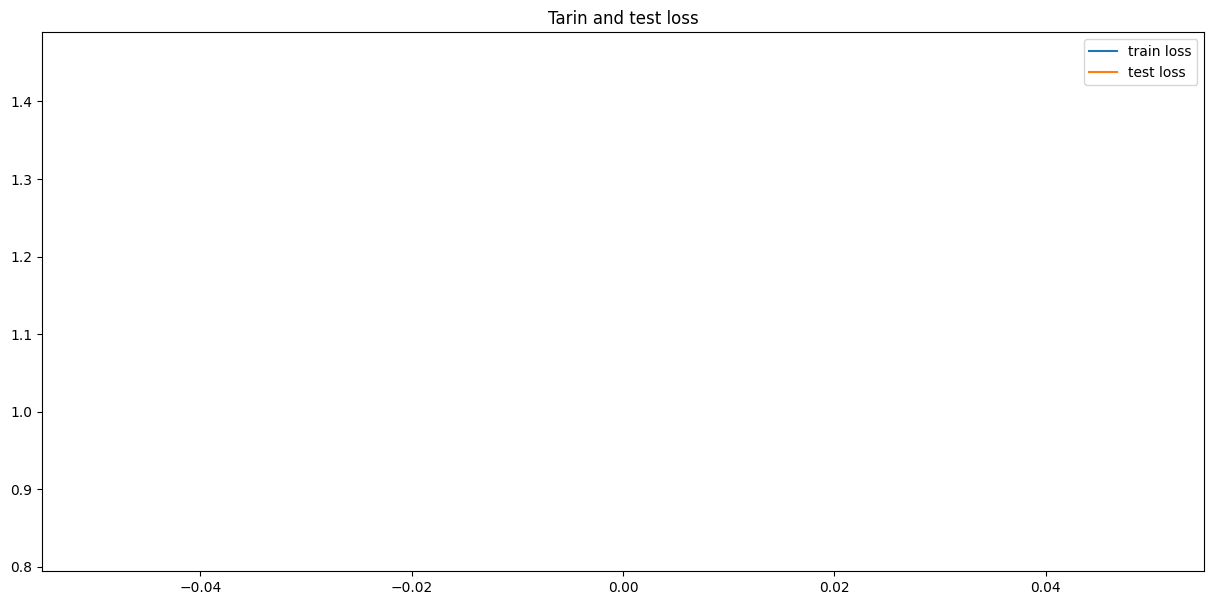

In [32]:
plt.figure(figsize=(15,7))
plt.title("Tarin and test loss")
plt.plot(history.history['loss'],label="train loss")
plt.plot(history.history['val_loss'],label="test loss")
plt.legend()
plt.show()

In [33]:
model.save("plant_disease.keras")

# Test the model on new images

In [39]:
from tensorflow.keras.models import load_model

In [34]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

In [36]:
def load_process_image(image_path):
    # Load the image with the specified target size
    image_ = image.load_img(image_path, target_size=(128, 128))

    # Convert the image to an array
    image_array = image.img_to_array(image_)

    # Expand the dimensions of the image array to add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)

    # Rescale the image array values to be between 0 and 1
    image_array = image_array / 255.0

    return image_array

In [37]:
image=load_process_image('/content/bact.jpeg')

In [38]:
np.argmax(model.predict(image),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([7])